# VISUALIZATIONS OF WHEAT DATA



In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import cv2
import ast
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from PIL import Image, ImageDraw

PATH = {
    'train': 'drive/My Drive/Object Detection/Wheat/train',
    'test': 'drive/My Drive/Object Detection/Wheat/test'
}

CSV = {
    'train': 'drive/My Drive/Object Detection/Wheat/train.csv',
    'sample_submission': 'drive/My Drive/Object Detection/Wheat/sample_submission.csv'
}

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = os.listdir(PATH['test'])
print(path)

['cc3532ff6.jpg', '51f1be19e.jpg', '51b3e36ab.jpg', 'cb8d261a3.jpg', 'f5a1f0358.jpg', '2fd875eaa.jpg', 'aac893a91.jpg', '348a992bb.jpg', '796707dd7.jpg', '53f253011.jpg']


In [ ]:
train = pd.read_csv(CSV['train'])
sample = pd.read_csv(CSV['sample_submission'])
print('Size of train data: ', train.shape)
print('Size of sample submission: ',sample.shape)


Size of train data:  (147793, 5)
Size of sample submission:  (10, 2)


In [ ]:
train.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [ ]:
train.describe()

,width,height
count,147793.0,147793.0
mean,1024.0,1024.0
std,0.0,0.0
min,1024.0,1024.0
25%,1024.0,1024.0
50%,1024.0,1024.0
75%,1024.0,1024.0
max,1024.0,1024.0


In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
source,0,0.0
bbox,0,0.0
height,0,0.0
width,0,0.0
image_id,0,0.0


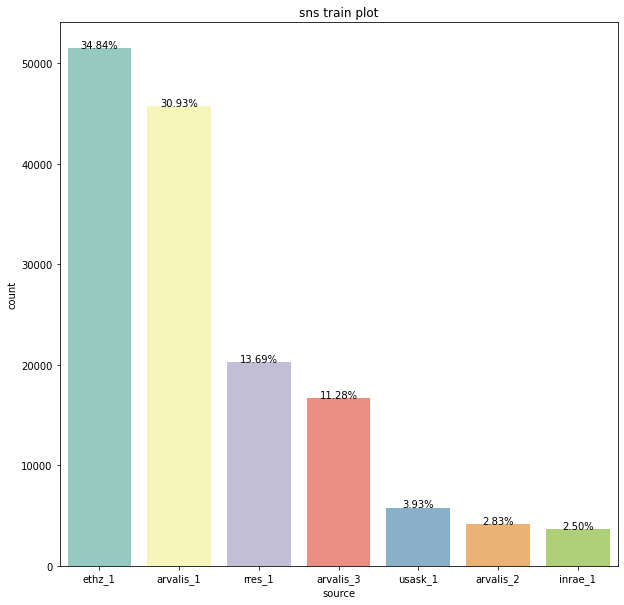

In [ ]:
def plot_counts(df, feature, title = '', size = 10):
    f, ax = plt.subplots(1, 1,figsize = (size,size))
    total = float(len(df))
    sns.countplot(df[feature], order = df[feature].value_counts().index, palette = 'Set3')
    plt.title(title)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3, '{:1.2f}%'.format(100*height/total),ha ='center')
    
    plt.show()

plot_counts(df = train, feature = 'source' , title = 'sns train plot', size = 10)

In [ ]:
img_dict = {}
with open(CSV['train']) as fp:
    reader = csv.reader(fp)
    next(reader)
    for row in tqdm(reader):
        if row[0] not in img_dict:
            img_dict[row[0]] = [ast.literal_eval(row[3])]
        else:
            img_dict[row[0]].append(ast.literal_eval(row[3]))

147793it [00:02, 68672.72it/s]


In [ ]:
print(img_dict['d61ad418f'])

[[730.0, 582.0, 75.0, 104.0], [729.0, 0.0, 50.0, 101.0], [703.0, 73.0, 91.0, 75.0], [0.0, 400.0, 25.0, 75.0], [704.0, 354.0, 104.0, 114.0], [286.0, 681.0, 63.0, 68.0], [693.0, 487.0, 71.0, 70.0], [487.0, 625.0, 104.0, 82.0], [909.0, 1.0, 33.0, 87.0], [593.0, 378.0, 52.0, 73.0], [602.0, 644.0, 92.0, 74.0], [791.0, 185.0, 69.0, 64.0], [879.0, 681.0, 84.0, 63.0], [666.0, 907.0, 105.0, 96.0], [529.0, 416.0, 38.0, 104.0], [334.0, 359.0, 112.0, 49.0], [112.0, 825.0, 99.0, 62.0], [846.0, 563.0, 42.0, 84.0], [581.0, 434.0, 60.0, 54.0], [479.0, 178.0, 121.0, 63.0], [211.0, 83.0, 87.0, 67.0], [885.0, 759.0, 119.0, 75.0], [55.0, 139.0, 73.0, 43.0], [383.0, 520.0, 86.0, 37.0], [327.0, 197.0, 67.0, 43.0], [669.0, 128.0, 93.0, 58.0], [532.0, 92.0, 85.0, 41.0], [0.0, 795.0, 78.0, 81.0], [68.0, 557.0, 75.0, 49.0], [961.0, 486.0, 63.0, 39.0], [290.0, 649.0, 77.0, 35.0], [843.0, 65.0, 58.0, 57.0], [283.0, 780.0, 89.0, 28.0], [456.0, 76.0, 66.0, 67.0], [192.0, 770.0, 70.0, 81.0], [175.0, 145.0, 97.0, 45.

In [ ]:
images = train.sample(n = 15, random_state = 20)['image_id'].values
print(images)

['d61ad418f' 'a1ecd6a63' 'ab2dc3037' '041707ba8' '6a82e6e98' 'f070c6f18'
 'dbcfa06bd' 'afe608129' '8ba166588' '4bb2dc30e' 'c5c70baa6' '7f4f977bf'
 '5aa3b67b7' '1b5e821f9' '9e50af3ab']


In [ ]:
def display_images(images):
    f, ax = plt.subplots(5,3,figsize = (25, 30))
    for i, image in enumerate(images):
        image_path = os.path.join(PATH['train'], f'{image}.jpg')
        img = Image.open(image_path)
        path = image_path[-13:-4]
        boxes = img_dict[image][:-4]

        draw = ImageDraw.Draw(img)
        for box in boxes:
            x, y, xx, yy = int(box[0]), int(box[1]), int(box[2]), int(box[3])
            draw.rectangle([x,y,x+xx,y+yy], width = 3, outline = (255, 0 ,0))
        
        ax[i//3, i%3].imshow(img)
        img.close()
        ax[i//3, i%3].axis('off')

        source = train[train['image_id'] == image].values[0][-1]
        ax[i//3, i%3].set_title(f'Image_id: {image}\nSource: {source}')
    plt.show()
display_images(images)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sample_images = sample.sample(n = 10)['image_id'].values
print(sample_images)

['2fd875eaa' 'cb8d261a3' 'cc3532ff6' 'f5a1f0358' '53f253011' '796707dd7'
 '51b3e36ab' '348a992bb' '51f1be19e' 'aac893a91']


In [ ]:
def display_samples(images):
    f, ax = plt.subplots(2, 5, figsize = (50, 20))
    for i, image_id in enumerate(images):
        image_path = os.path.join(PATH['test'], f'{image_id}.jpg')
        img = Image.open(image_path)
        
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title(f'Image_id: {image_id}')
    
    plt.show()

display_samples(sample_images)
        

Output hidden; open in https://colab.research.google.com to view.